In [2]:
## CNN with CIFAR - 10 dataset

# CNN with CIFAR - 10 dataset

In [8]:
import tensorflow as tf

##Train Test Split

In [9]:
 (xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.cifar10.load_data()

 # Normalize pixel values to be between 0 and 1
 xtrain = xtrain.astype('float32') / 255.0
 xtest = xtest.astype('float32') / 255.0

 # Convert labels to categorical
 ytrain = tf.keras.utils.to_categorical(ytrain, 10)
 ytest = tf.keras.utils.to_categorical(ytest, 10)


## Model creation

In [10]:
model = tf.keras.Sequential([
 #First Block
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Dropout(0.25),

 #Second Block
 tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Dropout(0.25),

 #Third Block
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.MaxPooling2D((2, 2)),
 tf.keras.layers.Dropout(0.25),

 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model compiling

In [11]:
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

## Model fitting

In [12]:
history = model.fit(xtrain, ytrain,
 batch_size=128,
 epochs=50,
 validation_split=0.2,
 verbose=1)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.3523 - loss: 2.1103 - val_accuracy: 0.1537 - val_loss: 3.3161
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5814 - loss: 1.2151 - val_accuracy: 0.6351 - val_loss: 1.0249
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6513 - loss: 0.9966 - val_accuracy: 0.6812 - val_loss: 0.9087
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7052 - loss: 0.8311 - val_accuracy: 0.7000 - val_loss: 0.8767
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7395 - loss: 0.7410 - val_accuracy: 0.7120 - val_loss: 0.8550
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7682 - loss: 0.6581 - val_accuracy: 0.7730 - val_loss: 0.6697
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7857 - loss: 0.6057 - val_accuracy: 0.7805 - val_loss: 0.6392
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8025 - loss: 0.5622 - val_ac

##Mode Evalutation

In [13]:
test_loss, test_accuracy = model.evaluate(xtest, ytest, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.8392
Test loss: 0.6503


## Epoch Vs Accuracy

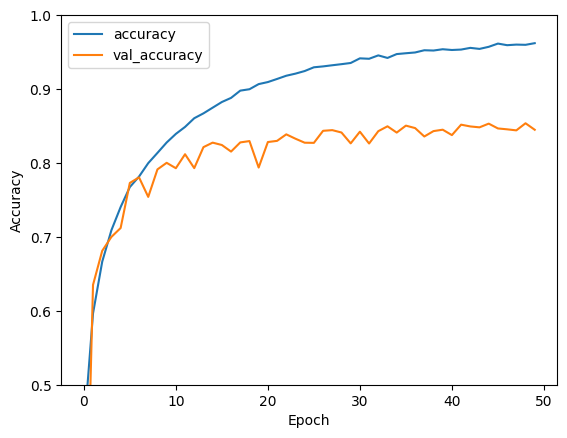

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

## Epoch vs Loss

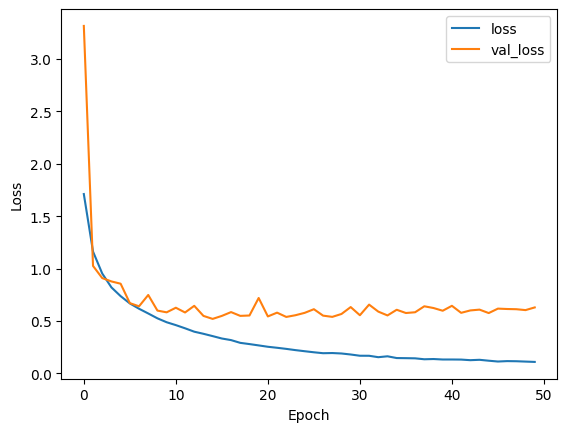

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()